In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sb.set()
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
df = pd.DataFrame(data =iris.data,columns = iris.feature_names)

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
df['targets'] = iris.target

In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),targets
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
df.targets.unique()

array([0, 1, 2])

In [20]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [24]:
df['flower_names'] = df.targets.apply(lambda x: iris.target_names[x])

In [25]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),targets,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [26]:
df0 = df[df.targets==0]
df1 = df[df.targets==1]
df2 = df[df.targets==2]

In [29]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),targets,flower_names
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


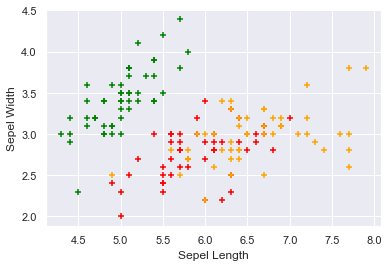

In [33]:
plt.xlabel('Sepel Length')
plt.ylabel('Sepel Width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker = '+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='red',marker = '+')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='orange',marker = '+')

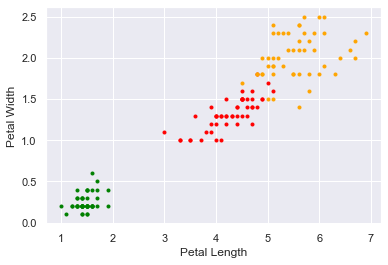

In [35]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green',marker = '.')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red',marker = '.')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='orange',marker = '.')

C:\Users\Suyash\miniconda33\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal length (cm)', ylabel='Density'>

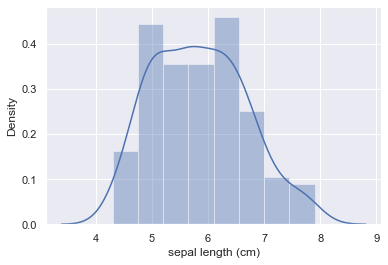

In [36]:
sb.distplot(df['sepal length (cm)'])

C:\Users\Suyash\miniconda33\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal width (cm)', ylabel='Density'>

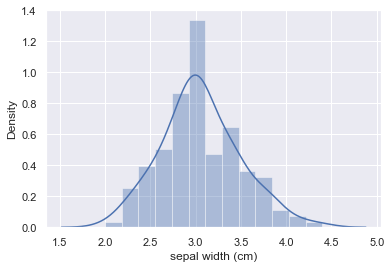

In [37]:
sb.distplot(df['sepal width (cm)'])

C:\Users\Suyash\miniconda33\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='petal length (cm)', ylabel='Density'>

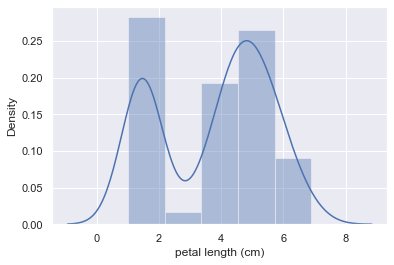

In [38]:
sb.distplot(df['petal length (cm)'])

C:\Users\Suyash\miniconda33\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='petal width (cm)', ylabel='Density'>

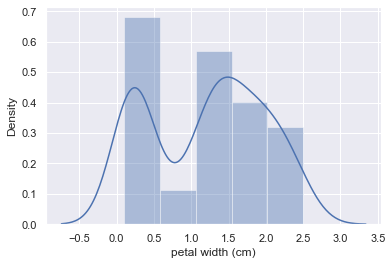

In [39]:
sb.distplot(df['petal width (cm)'])

In [44]:
from sklearn.svm import SVC

In [45]:
svm = SVC()

In [48]:
x = df.iloc[:,0:4]
y = df['targets']

In [56]:
scale = StandardScaler()

In [62]:
x = scale.fit_transform(x)

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size=0.2)

In [66]:
svm.fit(x_train,y_train)

SVC()

In [70]:
pred = svm.predict(x_test)

In [69]:
from sklearn.metrics import confusion_matrix

In [71]:
confusion_matrix(y_test, pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [72]:
from sklearn.metrics import accuracy_score

In [74]:
accuracy_score(y_test, pred)

1.0